<a href="https://colab.research.google.com/github/Rohit-Rannavre/data-science/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Loading the data

In [85]:
df = pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## Data preprocessing

In [100]:
# checking the shape of the dataset
df.shape

(2290, 6)

In [101]:
# getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [102]:
# getting the statistics of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [105]:
# checking the duplicate values in the dataset
df.duplicated().sum()

0

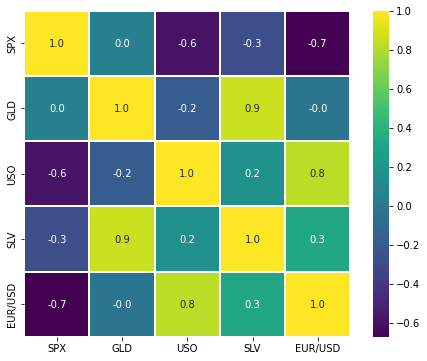

In [106]:
# looking at the corr. in the dataset
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True, annot_kws = {'size': 10}, fmt = '.1f', cmap = 'viridis', square = True, linewidth = 1)
plt.show();

## Model building

In [109]:
# creating X & y
X = df.drop(['Date', 'GLD'], axis = 1)
y = df['GLD']

In [110]:
# splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

In [111]:
# fitting the RF regressor model to the data
rf_reg = RandomForestRegressor(n_estimators=90)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=90)

In [112]:
# making predictions
y_pred = rf_reg.predict(X_test)

## Model evaluation through r2 & visualization

In [113]:
# computing the r2 score
metrics.r2_score(y_test, y_pred)

0.9870509569785739

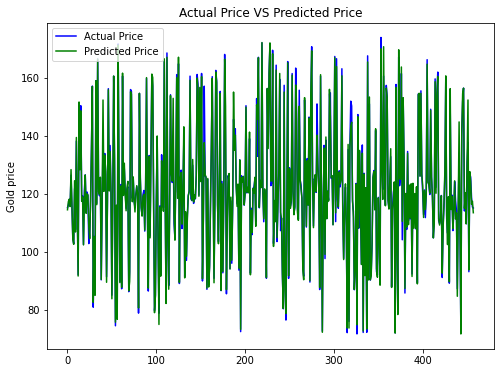

In [114]:
# visualization
plt.figure(figsize = (8, 6))
y_test = list(y_test)
plt.plot(y_test, color = 'blue', label = 'Actual Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.xlabel= ('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()